# MNIST Study
## Get the libraries

In [1]:
from principal_DNN_MNIST import DNN
from download_data import mnist_data
import matplotlib.pyplot as plt
from utils import subsample_data_set

## Get the data and preprocess it

In [2]:
X_train, X_test, y_train, y_test = mnist_data(path="data/")

## Creation of the DNN

In [3]:
CONFIG = [784, 200, 200, 10]
BATCH_SIZE = 512
EPSILON = 0.1
NB_EPOCHS_RBM = 100
NB_EPOCHS_DNN = 200
NB_DATA_TRAINING = None

In [4]:
# Create the model
dnn = DNN(config=CONFIG)

dnn, losses = dnn.pretrain_DNN(X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=True)

dnn, loss = dnn.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=True)

final_error = dnn.test_dnn(X_test, y_test)

Training DBN with 3 RBM(s)
Training RBM 1 / 3
  Epoch 0/100 : RMSE = 28.24920301522608
  Epoch 20/100 : RMSE = 15.277116733949727
  Epoch 40/100 : RMSE = 12.86608608011797
  Epoch 60/100 : RMSE = 11.770847760486163
  Epoch 80/100 : RMSE = 11.135785008048753
Training RBM 2 / 3
  Epoch 0/100 : RMSE = 13.621833979768432
  Epoch 20/100 : RMSE = 7.03812186478434
  Epoch 40/100 : RMSE = 6.009224869100796
  Epoch 60/100 : RMSE = 5.40694166961455
  Epoch 80/100 : RMSE = 4.98654478604421
Training RBM 3 / 3
  Epoch 0/100 : RMSE = 17.013876851432574
  Epoch 20/100 : RMSE = 11.511555382088169
  Epoch 40/100 : RMSE = 11.170859813771775
  Epoch 60/100 : RMSE = 11.107008905462266
  Epoch 80/100 : RMSE = 11.097287511099132
Training DNN
    Epoch 0/200: loss is 11.902355003435513
    Epoch 25/200: loss is 0.3519129407173546
    Epoch 50/200: loss is 0.25202851996030146
    Epoch 75/200: loss is 0.205366038908104
    Epoch 100/200: loss is 0.17579236277188734
    Epoch 125/200: loss is 0.154260562771786

## Analysis

### Error rates

In [5]:
print("-- Pretraining model --")
dnn_pretraining = DNN(config=CONFIG)
dnn_pretraining, losses = dnn_pretraining.pretrain_DNN(X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=True)
dnn_pretraining, loss = dnn_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=True)

print("-- No pretraining model --")
dnn_no_pretraining = DNN(config=CONFIG)
dnn_no_pretraining, loss = dnn_no_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=True)

error_rate_pretraining_train = dnn_pretraining.test_dnn(X_train, y_train, verbose=False)
error_rate_pretraining_test = dnn_pretraining.test_dnn(X_test, y_test, verbose=False)

error_rate_no_pretraining_train = dnn_no_pretraining.test_dnn(X_train, y_train, verbose=False)
error_rate_no_pretraining_test = dnn_no_pretraining.test_dnn(X_test, y_test, verbose=False)

-- Pretraining model --
Training DBN with 3 RBM(s)
Training RBM 1 / 3
  Epoch 0/100 : RMSE = 27.829512553215064
  Epoch 20/100 : RMSE = 15.081080232379007
  Epoch 40/100 : RMSE = 12.690977866888186
  Epoch 60/100 : RMSE = 11.563651838942057
  Epoch 80/100 : RMSE = 10.926058739619538
Training RBM 2 / 3
  Epoch 0/100 : RMSE = 14.110874164486678
  Epoch 20/100 : RMSE = 7.450285556864107
  Epoch 40/100 : RMSE = 6.366607520884319
  Epoch 60/100 : RMSE = 5.712228549455895
  Epoch 80/100 : RMSE = 5.271321122227319
Training RBM 3 / 3
  Epoch 0/100 : RMSE = 16.455057611970602
  Epoch 20/100 : RMSE = 11.365391459446332
  Epoch 40/100 : RMSE = 11.044598981319307
  Epoch 60/100 : RMSE = 10.565134888184616
  Epoch 80/100 : RMSE = 10.482857863072985
Training DNN
    Epoch 0/200: loss is 9.317631394178628
    Epoch 25/200: loss is 0.3523735306585467
    Epoch 50/200: loss is 0.2506201013041753
    Epoch 75/200: loss is 0.20477061807652824
    Epoch 100/200: loss is 0.1766965835837477
    Epoch 125/20

In [7]:
print("Pretraining model:")
print(f" Error rate for training set: {error_rate_pretraining_train:.2f}%")
print(f" Error rate for test set: {error_rate_pretraining_test:.2f}%")

print("No pretraining model:")
print(f" Error rate for training set: {error_rate_no_pretraining_train:.2f}%")
print(f" Error rate for test set: {error_rate_no_pretraining_test:.2f}%")

Pretraining model:
 Error rate for training set: 3.30%
 Error rate for test set: 4.52%
No pretraining model:
 Error rate for training set: 1.95%
 Error rate for test set: 3.99%


### Number of layers

Configuration: [784, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 200, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 200, 200, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 200, 200, 200, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 200, 200, 200, 200, 10]
-- Pretraining model --
-- No pretraining model --


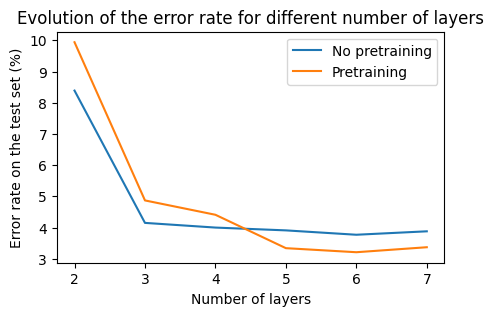

In [8]:
configurations = [
    [784, 10],
    [784, 200, 10],
    [784, 200, 200, 10],
    [784, 200, 200, 200, 10],
    [784, 200, 200, 200, 200, 10],
    [784, 200, 200, 200, 200, 200, 10],
]
error_rate_no_pretraining = []
error_rate_pretraining = []
for config in configurations:
    print(f"Configuration: {config}")
    print("-- Pretraining model --")
    dnn_pretraining = DNN(config=config)
    dnn_pretraining, losses = dnn_pretraining.pretrain_DNN(X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=False)
    dnn_pretraining, loss = dnn_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_pretraining.append(dnn_pretraining.test_dnn(X_test, y_test, verbose=False))

    print("-- No pretraining model --")
    dnn_no_pretraining = DNN(config=config)
    dnn_no_pretraining, loss = dnn_no_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_no_pretraining.append(dnn_no_pretraining.test_dnn(X_test, y_test, verbose=False))

plt.figure(figsize=(5, 3))
plt.plot([2, 3, 4, 5, 6, 7], error_rate_no_pretraining, label='No pretraining')
plt.plot([2, 3, 4, 5, 6, 7], error_rate_pretraining, label='Pretraining')
plt.title("Evolution of the error rate for different number of layers")
plt.xlabel('Number of layers')
plt.ylabel("Error rate on the test set (%)")
plt.legend()
plt.show()

### Number of neurons

In [13]:
configurations = [
    [784, 100, 100, 10],
    [784, 200, 200, 10],
    [784, 300, 300, 10],
    [784, 500, 500, 10],
    [784, 700, 700, 10]
]
error_rate_no_pretraining = []
error_rate_pretraining = []
for config in configurations:
    print(f"Configuration: {config}")
    print("-- Pretraining model --")
    dnn_pretraining = DNN(config=config)
    dnn_pretraining, losses = dnn_pretraining.pretrain_DNN(X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=False)
    dnn_pretraining, loss = dnn_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_pretraining.append(dnn_pretraining.test_dnn(X_test, y_test, verbose=False))

    print("-- No pretraining model --")
    dnn_no_pretraining = DNN(config=config)
    dnn_no_pretraining, loss = dnn_no_pretraining.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_no_pretraining.append(dnn_no_pretraining.test_dnn(X_test, y_test, verbose=False))

plt.figure(figsize=(5, 3))
plt.plot([100, 200, 300, 500, 700], error_rate_no_pretraining, label='No pretraining')
plt.plot([100, 200, 300, 500, 700], error_rate_pretraining, label='Pretraining')
plt.title("Evolution of the error rate for different number of neurons")
plt.xlabel('Number of neurons')
plt.ylabel("Error rate")
plt.show()

Configuration: [784, 100, 100, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 200, 200, 10]
-- Pretraining model --
-- No pretraining model --
Configuration: [784, 300, 300, 10]
-- Pretraining model --


### Number of training data

In [ ]:
nb_data = [1000, 3000, 7000, 10000 30000, 60000]
CONFIG = [784, 200, 200, 10]
error_rate_no_pretraining = []
error_rate_pretraining = []
for nb in nb_data:
    print(f"Number of data: {nb}")
    print("-- Pretraining model --")
    X_train_sub, y_train_sub = subsample_data_set(X_train, y_train, nb)
    dnn_pretraining = DNN(config=CONFIG)
    dnn_pretraining, losses = dnn_pretraining.pretrain_DNN(X_train_sub, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=False)
    dnn_pretraining, loss = dnn_pretraining.retropropagation(X_train_sub, y_train_sub, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_pretraining.append(dnn_pretraining.test_dnn(X_test, y_test, verbose=False))

    print("-- No pretraining model --")
    dnn_no_pretraining = DNN(config=CONFIG)
    dnn_no_pretraining, loss = dnn_no_pretraining.retropropagation(X_train_sub, y_train_sub, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=False)
    error_rate_no_pretraining.append(dnn_no_pretraining.test_dnn(X_test, y_test, verbose=False))

plt.figure(figsize=(5, 3))
plt.plot(nb_data, error_rate_no_pretraining, label='No pretraining')
plt.plot(nb_data, error_rate_pretraining, label='Pretraining')
plt.title("Evolution of the error rate for different len of training set")
plt.xlabel('Len of training set')
plt.ylabel("Error rate")
plt.show()

### Conclusion

In [ ]:
# Best parameters
CONFIG = [784, 100, 10]
BATCH_SIZE = 32
EPSILON = 0.1
NB_EPOCHS_RBM = 100
NB_EPOCHS_DNN = 200
NB_DATA_TRAINING = None

X_train_sub, y_train_sub = subsample_data_set(X_train, y_train, NB_DATA_TRAINING)
dnn = DNN(config=CONFIG)
dnn, losses = dnn.pretrain_DNN(X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_RBM, verbose=True)
dnn, loss = dnn.retropropagation(X_train, y_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS_DNN, verbose=True)
error_rate = dnn.test_dnn(X_test, y_test, verbose=True)